# Constraste o Prueba de Kolmogorov-Smirnov

a) RANDU


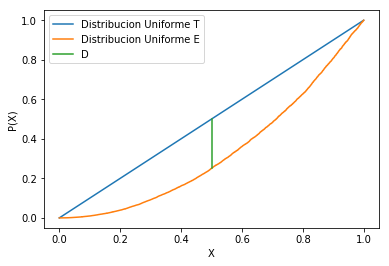

Mayor Diferencia:  0.2514961231603975
Estadistico Teorico:  0.013600000000000001
El generador de aleatorios no garantiza la uniformidad
 
b) Sinclair ZX81


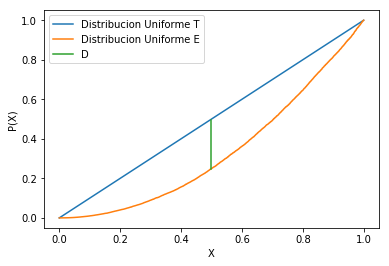

Mayor Diferencia:  0.24794094383452941
Estadistico Teorico:  0.013600000000000001
El generador de aleatorios no garantiza la uniformidad
 
c) Numerical reciepes


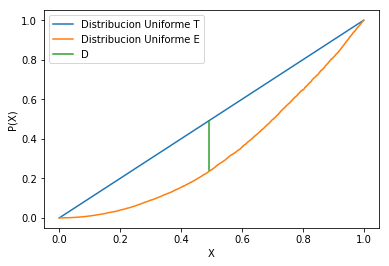

Mayor Diferencia:  0.24840188623413517
Estadistico Teorico:  0.013600000000000001
El generador de aleatorios no garantiza la uniformidad
 
d) Borland C/C++


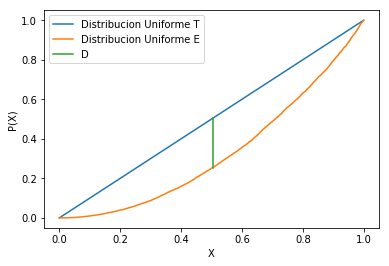

Mayor Diferencia:  0.2504498301362714
Estadistico Teorico:  0.013600000000000001
El generador de aleatorios no garantiza la uniformidad
 


In [3]:
# import math
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline
from datetime import datetime

class KolmogorovSmirnov:
    
    p = []
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    u = []
    alp = 0
    calp = 0
    plt1 = pl
    
    def __init__(self,p,u,alp,calp,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        self.p = p
        self.u = u
        self.alp = alp
        self.calp = calp
        
    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getDistUniVb(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v
        
    def kolSm(self):
        x1 = self.p
        y1 = np.cumsum(np.sort(self.u)/np.max(np.cumsum(self.u)))
        x = self.getDistUniVb()
        x2 = np.sort(x)
        y2 = np.cumsum(x2/np.max(np.cumsum(x2)))
        D=np.absolute(y2-y1)
        self.graf(pl,x1,y1,x2,y2,D)
        self.validTest(y2,np.max(D))
        
    def validTest(self,y2,D):
        est = 1.36/math.sqrt(n)
        print("Mayor Diferencia: ",D)
        print("Estadistico Teorico: ",est)
        if D > est: 
            print("El generador de aleatorios no garantiza la uniformidad")
        else: 
            print("El generador de aleatorios sí garantiza la uniformidad")
        print(" ")
        
    def graf(self,plt,x1,y1,x2,y2,D):
        plt.plot(x1,y1,label='Distribucion Uniforme T')
        plt.step(x2,y2,label='Distribucion Uniforme E')
        x3 = [x1[D.argmax()],x1[D.argmax()]]
        y3 = [np.min([y1[D.argmax()],y2[D.argmax()]]),np.max([y1[D.argmax()],y2[D.argmax()]])]
        plt.step(x3,y3,label='D')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('P(X)')
        plt.show()

xn = datetime.now().microsecond
n = 10000
print("a)","RANDU")
a = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,xn,65539,2**31,n)
a.kolSm()

print("b)","Sinclair ZX81")
xn = datetime.now().microsecond
b = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,xn,75,(2**16+1),n)
b.kolSm()

print("c)","Numerical reciepes")
xn = datetime.now().microsecond
c = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,xn,1664525,(2**32),n, c= 1013904223)
c.kolSm()

print("d)","Borland C/C++")
xn = datetime.now().microsecond
c = KolmogorovSmirnov(np.arange(1/n,1+1/n,1/n),[1]*n,0.05,1.36,xn,22695477,(2**32),n, c= 1)
c.kolSm()

# Contraste o Prueba X^2

In [4]:
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline
from datetime import datetime

class chi2:
    
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    alp = 0
    k = 0
    plt1 = pl
    
    def __init__(self,alp,k,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        self.alp = alp
        self.k = k

    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getvAl(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v
    
    def getFre(self,v):
        fre = pl.hist(v,self.k)[0]
        pl.close()
        return fre
    
    def chi_2(self):
        v = self.getvAl()
        re = self.getFre(v)
        suma = 0
        ex = self.n/self.k
        
        for i in range(self.k):
            suma += (re[i] - ex )**2/ex
            
        if(suma < self.alp):
            print("\tEl generador garantiza uniformidad")
        else:
            print("\tEl generador no garantiza uniformidad")
        
xn = datetime.now().microsecond
print("a)","RANDU")
a = chi2(16.919,10,xn,65539,2**31,1000)
a.chi_2()

print("b)","Sinclair ZX81")
b = chi2(16.919,10,xn,75,(2**16+1),1000)
b.chi_2()

print("c)","Numerical reciepes")
c = chi2(16.919,10,xn,1664525,2**32,1000,1013904223)
c.chi_2()

print("d)","Borland C/C++")
d = chi2(16.919,10,xn,22695477,2**32,1000,1)
d.chi_2()

a) RANDU
	El generador garantiza uniformidad
b) Sinclair ZX81
	El generador garantiza uniformidad
c) Numerical reciepes
	El generador garantiza uniformidad
d) Borland C/C++
	El generador garantiza uniformidad


# Constraste o Prueba de Rachas

In [6]:
import math

class TestRachas():
    xn = 0
    a = 0 
    m = 0
    c = 0
    n = 0
    z = 0
    
    def __init__(self,xn,a,m,n,c = 0):
        self.xn = xn
        self.a = a
        self.m = m
        self.c = c
        self.n = n
        
    def generar_aleatorio(self):
        x = (self.a*self.xn + self.c) % self.m
        self.xn = x
        return(x/self.m)
        
    def getDistAl(self):
        v = [None]*self.n
        for i in range(self.n):
            v[i] = self.generar_aleatorio()
        return v

    def getScSimBin(self,v):
        sym = "";
        cunos = 0
        cceros = 0
        for i in range(self.n - 1):
            if(v[i] < v[i+1]):
                sym+="1"
                cunos += 1
            else:
                cceros += 1
                sym+="0"
        return sym,cunos,cceros
    
    def contRachas(self,sym):
        rachas = 0
        auxc = 0
        auxu = 0
        s = len(sym)
        
        if(sym[0] == "1"):
            bin = True
        else:
            bin = False
        for i in range(s):
            if(bin):
                if(sym[i] == "1"):
                    auxu += 1
                else:
                    bin = False
                    auxc = 0
                    if(auxu > 0):
                        rachas += 1
                        auxu = 0

                if(i+1 == s and auxu > 0):
                    rachas+=1
                
            if(bin == False):
                if(sym[i] == "0"):
                    auxc += 1
                else:
                    bin = True
                    auxu +=1
                    if(auxc > 0):
                        rachas += 1
                        auxc = 0

                if(i+1 == s and auxc > 0):
                    rachas+=1
        return rachas
    
    def calEst(self,cunos,cceros,r):
        n = cunos + cceros
        Z = ((r - (2*n)-1)/3)/math.sqrt((16*n-29)/90)
        print("Z = ", Z)
        u = (2*cunos*cceros)/(n) + 1
        zo = 1.960 #Tomado de la tabla de distribucion normal con alpha/2 y un nivel de confianza del 95%
    
        if abs(Z)>zo:
            print("No cumple con el criterio de aleatoriedad")
        else:
            print("Si cumple con el  criterio de aleatoriedad")
        print(" ")
    
    def ttRachas(self):
        v = self.getDistAl()
        sym,cunos,cceros = self.getScSimBin(v)
        r = self.contRachas(sym)
        print("Rachas: ",r)
        self.calEst(cunos,cceros,r)

print("Zo Teorico = ", 1.960,"\n")        
xn = datetime.now().microsecond
n = 1000

print("a)","RANDU")
a = TestRachas(xn,65539,2**31,n)
a.ttRachas()

print("b)","Sinclair ZX81")
b = TestRachas(xn,75,(2**16+1),n)
b.ttRachas() 

print("c)","Numerical reciepes")
c = TestRachas(xn,1664525,2**32,n,1013904223)
c.ttRachas() 

print("d)","Borland C/C++")
d = TestRachas(xn,22695477,2**32,n,1)
d.ttRachas() 

Zo Teorico =  1.96 

a) RANDU
Rachas:  665
Z =  -33.39699759632237
No cumple con el criterio de aleatoriedad
 
b) Sinclair ZX81
Rachas:  669
Z =  -33.29685667399456
No cumple con el criterio de aleatoriedad
 
c) Numerical reciepes
Rachas:  673
Z =  -33.196715751666765
No cumple con el criterio de aleatoriedad
 
d) Borland C/C++
Rachas:  665
Z =  -33.39699759632237
No cumple con el criterio de aleatoriedad
 
